In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = yf.download("TSLA")

C:\Users\srmpc\AppData\Local\Temp\ipykernel_36540\2258612864.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-06-18,322.049988,329.320007,315.450012,317.309998,95137700
2025-06-20,322.160004,332.359985,317.779999,327.950012,108688000
2025-06-23,348.679993,357.540009,327.480011,327.540009,190716800
2025-06-24,340.470001,356.260010,340.440002,356.170013,114736200
2025-06-25,327.549988,343.000000,320.399994,342.700012,119446200


In [3]:
df.shape

(3771, 5)

<Axes: xlabel='Date'>

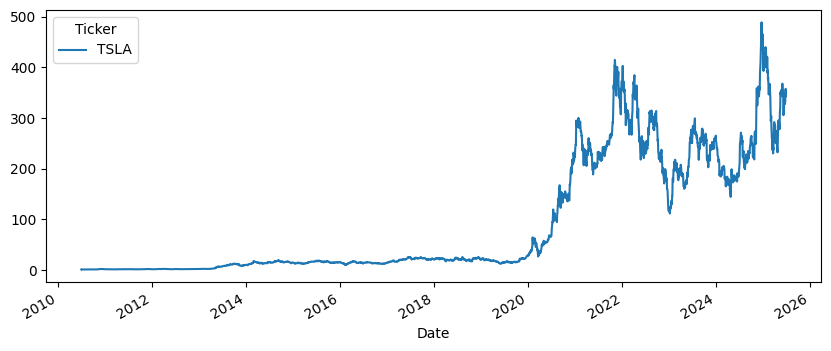

In [4]:
df['High'].plot(figsize=(10,4))

<Axes: xlabel='Date'>

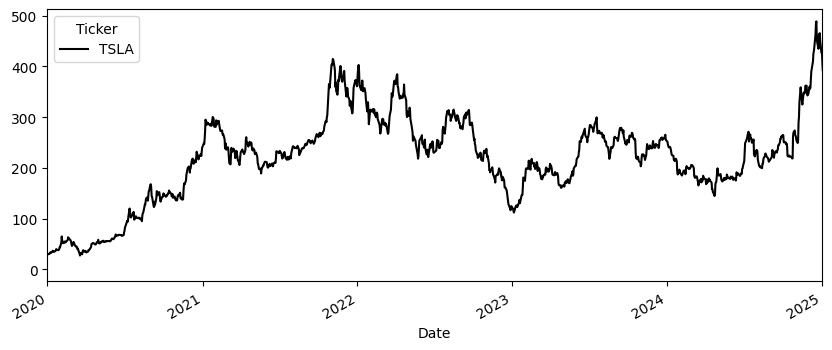

In [5]:

df['High'].plot(xlim=['2020-01-01','2025-01-01'],figsize=(10,4),ls ='-', c='black')

In [6]:
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [7]:
index = df.loc['2020-01-01':'2025-01-01'].index
share_open = df.loc['2020-01-01':'2025-01-01']['Open']

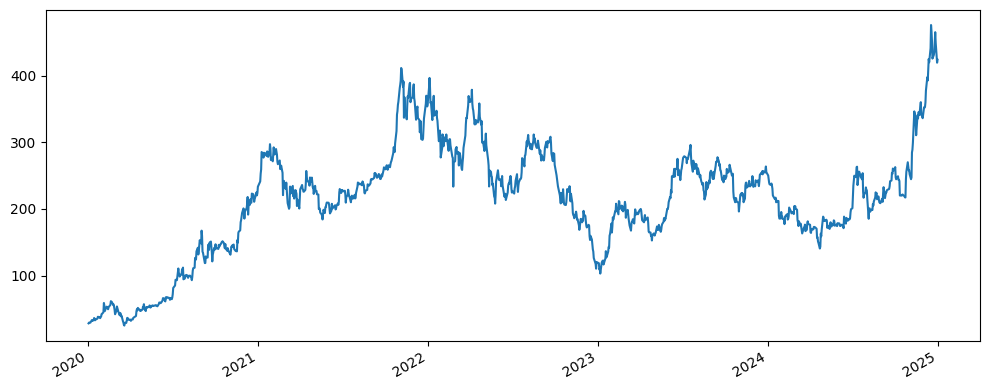

In [8]:
figure, axis = plt.subplots(figsize=(10,4))
axis.plot(index, share_open)
figure.autofmt_xdate()
plt.tight_layout()


In [9]:
#Datetime index
df = df.reset_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3771 non-null   datetime64[ns]
 1   (Close, TSLA)   3771 non-null   float64       
 2   (High, TSLA)    3771 non-null   float64       
 3   (Low, TSLA)     3771 non-null   float64       
 4   (Open, TSLA)    3771 non-null   float64       
 5   (Volume, TSLA)  3771 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 176.9 KB


In [11]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [12]:
#Convert ('Date', '') to datetime
df[('Date')] = pd.to_datetime(df[('Date')])

#Set it as index
df.set_index(('Date'), inplace=True)


<Axes: xlabel='Date'>

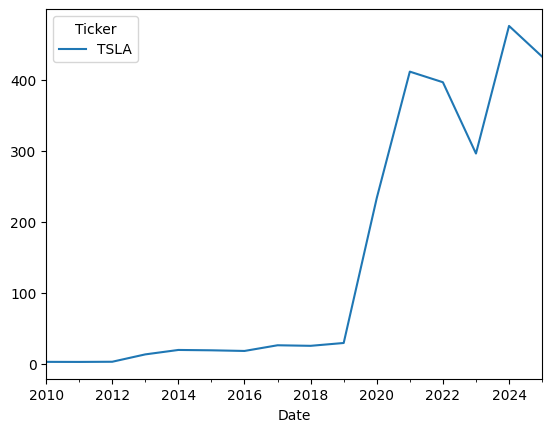

In [13]:
#Time Resampling
#Year end frequency
df.resample('A').max()['Open'].plot()

<Axes: xlabel='Date'>

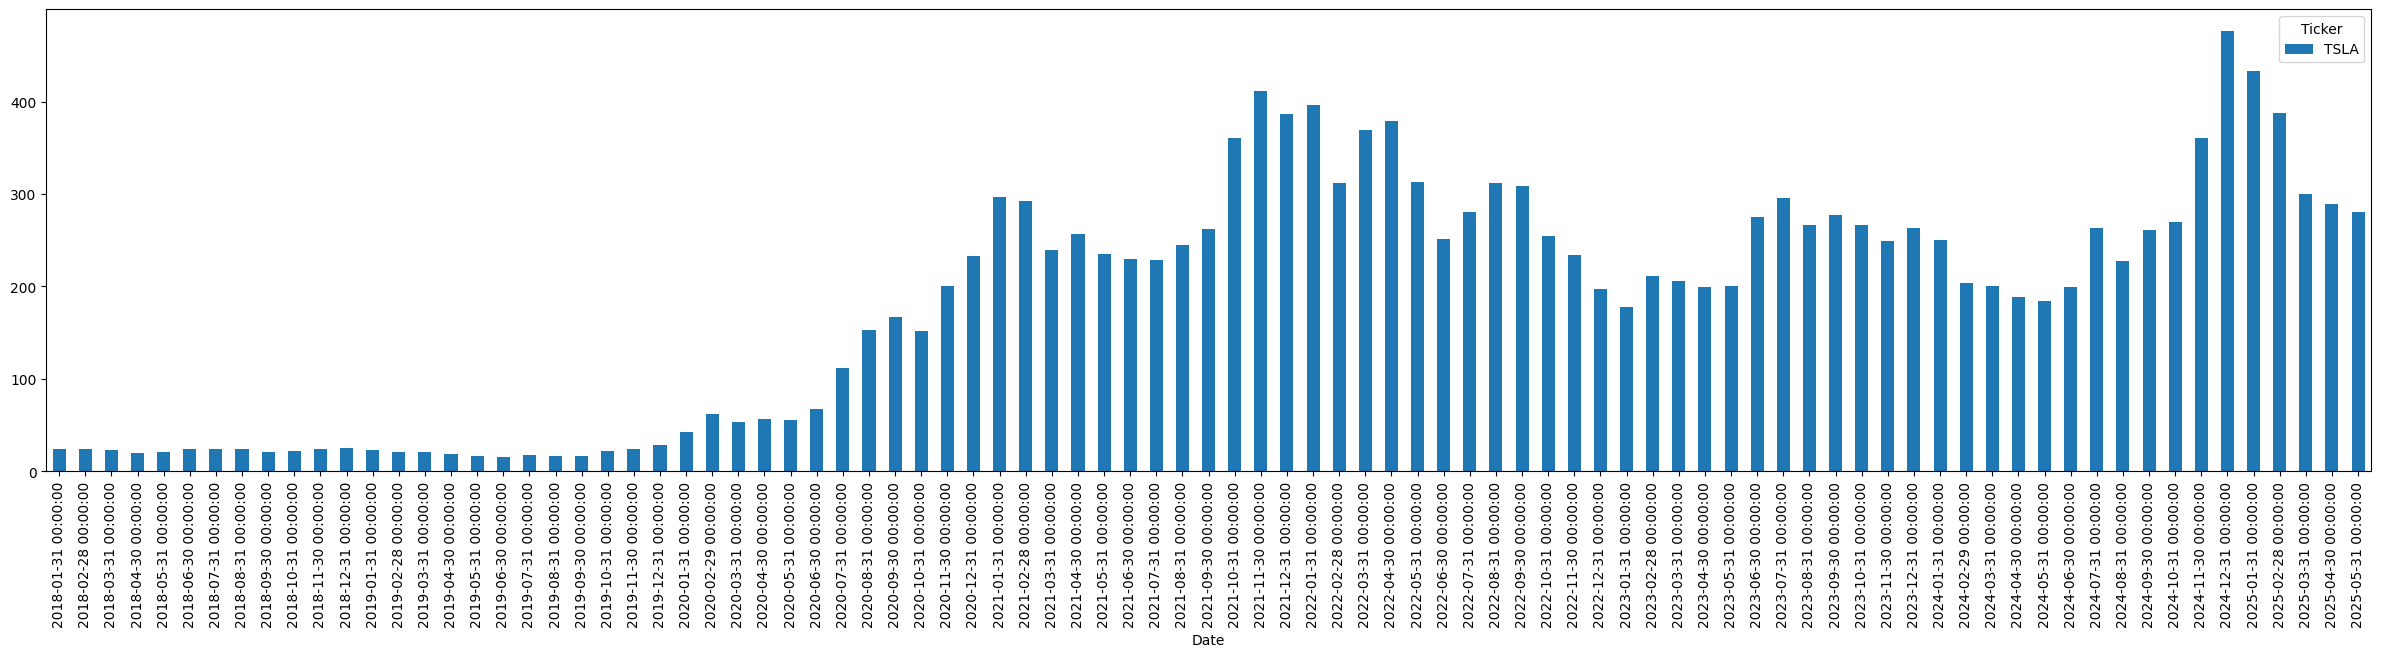

In [14]:

df.loc['2018-01-01':'2025-05-01']['Open'].resample(rule='M').max().plot(kind='bar', figsize=(30,6))

In [15]:
#Rolling mean
df['High'].rolling(10).mean()

Ticker,TSLA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2025-06-18,325.738995
2025-06-20,326.519995
2025-06-23,331.723996


In [16]:
df['Open:30 days rolling'] = df['Open'].rolling(30).mean()

<Axes: xlabel='Date'>

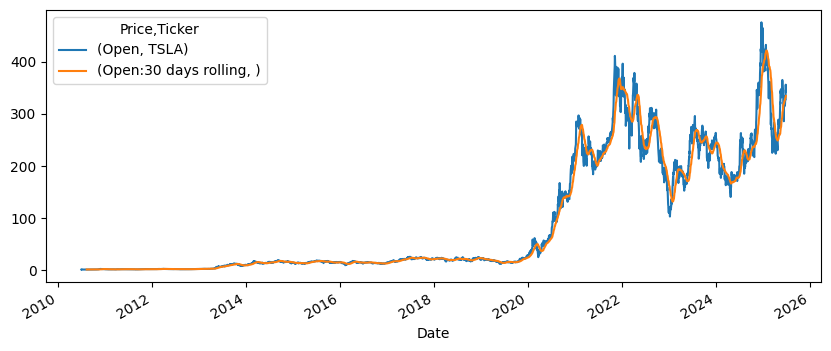

In [17]:
df[['Open', 'Open:30 days rolling']].plot(figsize=(10,4))

In [18]:
#Simple moving avg, cumulative moving avg, exponantial weight moving avg, moving avg, acf(MA), pacf(AR), auto regressive model, 

In [21]:
#simple moving avg
df['Open:10 days rolling'] = df['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

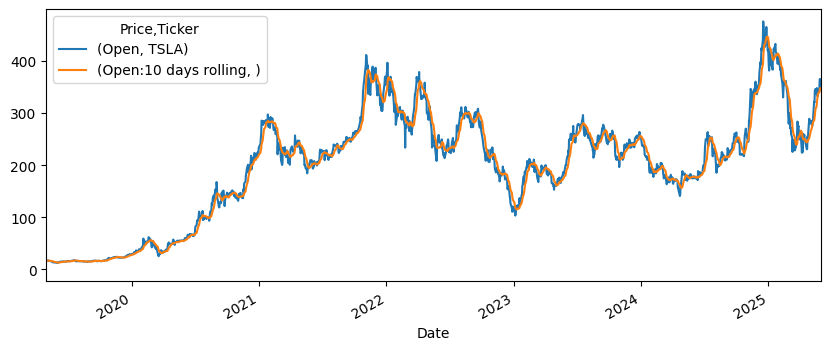

In [31]:
df[['Open','Open:10 days rolling']].plot(xlim=['2019.05.01','2025.06.01'],figsize=(10,4))

<Axes: xlabel='Date'>

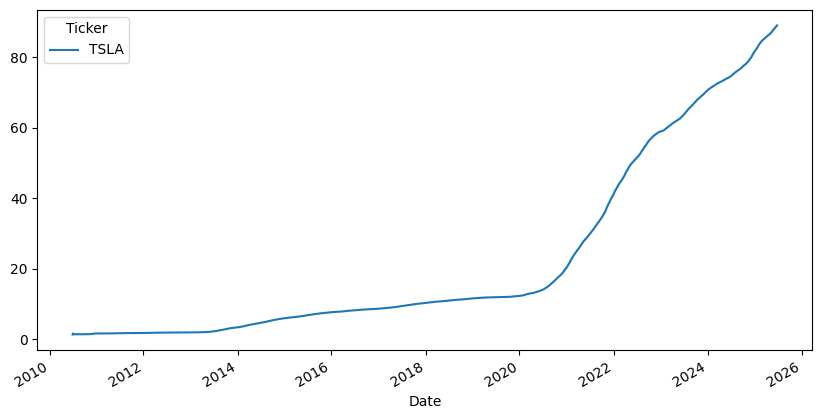

In [ ]:
#Cumulative moving avg
#Expanding
df['Open'].expanding().mean().plot(figsize=(10,5))

In [33]:
#Exponantial weighted moving avg
df['EMA_0.1'] = df['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

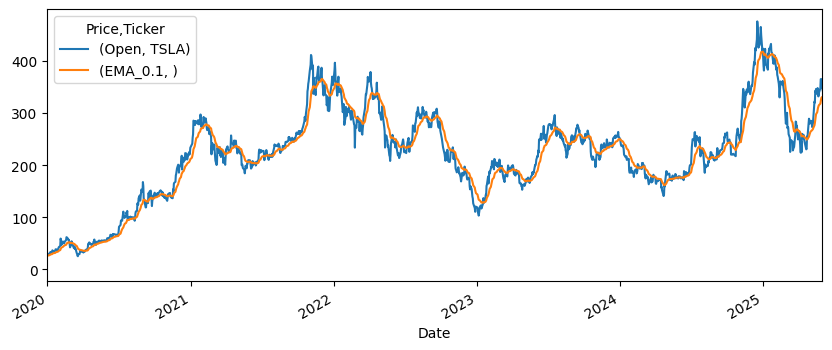

In [34]:
df[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2025-06-01'],figsize=(10,4))

In [ ]:
#moving avg models
